In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
sample = np.random.multivariate_normal((1.2,1.2), np.array([[.1,.2],[.2,.4]]), size=1000000)

In [344]:
from scipy.stats import skewnorm
a=10
data= skewnorm.rvs(a, size=1000)

In [378]:
# data

In [513]:
y1 = np.exp(np.random.normal(size=1000000,loc=0.22,scale=.12))

In [514]:
y1_base_l = np.random.uniform(low=0.2,high=.6, size=500)
y1_base_r = np.random.uniform(low=1.2,high=3, size=5000)

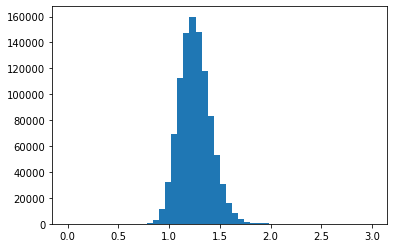

In [515]:
plt.hist(np.concatenate([y1,y1_base_l, y1_base_r]), range=[0,3],bins=50)
plt.show()

In [516]:
err = np.random.normal(size=1000000,loc=0,scale=0.03+0.1*y1)
y2 = y1 + err

In [517]:
y2_base_l = 1+ np.random.normal(size=500,loc=0,scale=0.05+0.2*y1_base_l)
y2_base_r = 1.5+ (0.1+0.15*y1_base_r)*skewnorm.rvs(20, size=5000) #np.random.normal(size=60000,loc=0,scale=0.06+0.15*y1_base_r)

In [518]:
smpldf = pd.DataFrame(np.vstack([y1,y2]).T,columns=['rs','vr'])

In [519]:
smpldf = smpldf.append(pd.DataFrame(np.vstack([y1_base_l,y2_base_l]).T,columns=['rs','vr']))

In [520]:
smpldf = smpldf.append(pd.DataFrame(np.vstack([y1_base_r,y2_base_r]).T,columns=['rs','vr']))

In [521]:
# smpldf = pd.DataFrame(sample,columns=['rs','vr'])

<ipython-input-522-4995be5e14f3>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


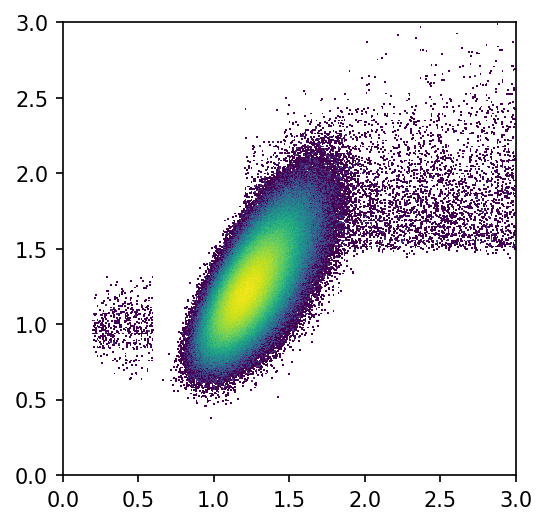

In [522]:
plt.figure(dpi=150, )
im1 = plt.hist2d(smpldf.rs, smpldf.vr, bins=500, norm=LogNorm())
# plt.colorbar(im1)
plt.xlim(0,3)
plt.ylim(0,3)
plt.axes().set_aspect('equal')
plt.show()

In [523]:
# print(*sample)

In [524]:
smpldf_grpd_rs = smpldf.groupby(pd.cut(smpldf.rs, bins=np.linspace(0.5,3,50)))

In [525]:
smpldf_grpd_rs_median = smpldf_grpd_rs.median()
smpldf_grpd_rs_1sig_l = smpldf_grpd_rs.quantile(.16)
smpldf_grpd_rs_1sig_r = smpldf_grpd_rs.quantile(.84)

In [526]:
smpldf_grpd_vr = smpldf.groupby(pd.cut(smpldf.vr, bins=np.linspace(0.5,3,50)))

In [527]:
smpldf_grpd_vr_median = smpldf_grpd_vr.median()
smpldf_grpd_vr_1sig_l = smpldf_grpd_vr.quantile(.16)
smpldf_grpd_vr_1sig_r = smpldf_grpd_vr.quantile(.84)

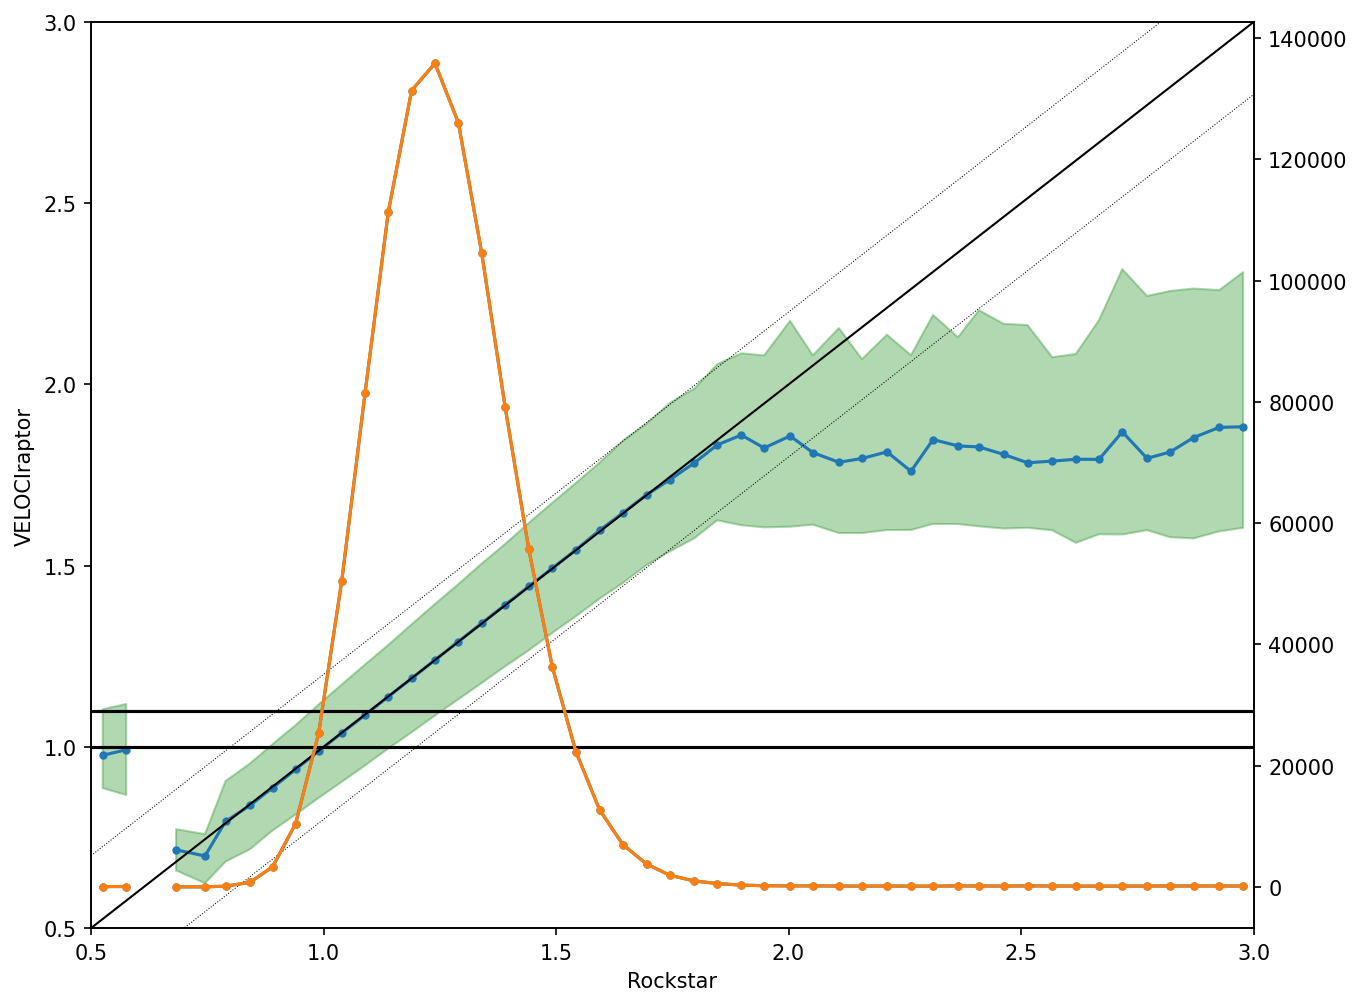

In [528]:
fig1, ax1 = plt.subplots(1, figsize=(10,8), dpi=150)
ax1.plot((smpldf_grpd_rs_median.rs), (smpldf_grpd_rs_median.vr), marker='o', markersize=3)
# plt.errorbar((hal_plot_mass_grpd_median.rs), (hal_plot_mass_grpd_median.vr), yerr= [(hal_plot_mass_grpd_median.vr)-(hal_plot_mass_grpd_1sig_l.vr), (hal_plot_mass_grpd_1sig_r.vr)-(hal_plot_mass_grpd_median.vr)])
ax1.fill_between((smpldf_grpd_rs_median.rs), (smpldf_grpd_rs_1sig_l.vr), (smpldf_grpd_rs_1sig_r.vr), color='green', alpha=.3)
scatrange = (.5,3)
ax1.set_xlim(*scatrange)
ax1.set_ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
ax1.plot(scatranx,scatranx,'k-', lw=1)
ax1.plot(scatranx,scatranx-0.2,'k:', lw=.5)
ax1.plot(scatranx,scatranx+0.2,'k:', lw=.5)
ax1.set_xlabel('Rockstar')
ax1.set_ylabel('VELOCIraptor')
ax2 = ax1.twinx()
ax2.plot((smpldf_grpd_rs_median.rs), (smpldf_grpd_rs.count()), marker='o', markersize=3)
plt.savefig('mockvar.svg')
ax1.axhline(1, c='k')
ax1.axhline(1.1, c='k')
# ax1.plot((smpldf_grpd_vr_median.rs), (smpldf_grpd_vr_median.vr), marker='o', markersize=3)
# # plt.errorbar((hal_plot_mass_grpd_median.vr), (hal_plot_mass_grpd_median.rs), yerr= [(hal_plot_mass_grpd_median.rs)-(hal_plot_mass_grpd_1sig_l.rs), (hal_plot_mass_grpd_1sig_r.rs)-(hal_plot_mass_grpd_median.rs)])
# ax1.fill_betweenx((smpldf_grpd_vr_median.vr), (smpldf_grpd_vr_1sig_l.rs), (smpldf_grpd_vr_1sig_r.rs), color='green', alpha=.3)
# ax1.set_ylabel('Rockstar')
# ax1.set_xlabel('VELOCIraptor')
# ax3 = ax1.twiny()
# ax3.plot((smpldf_grpd_vr.count()), (smpldf_grpd_vr_median.vr), marker='o', markersize=3)

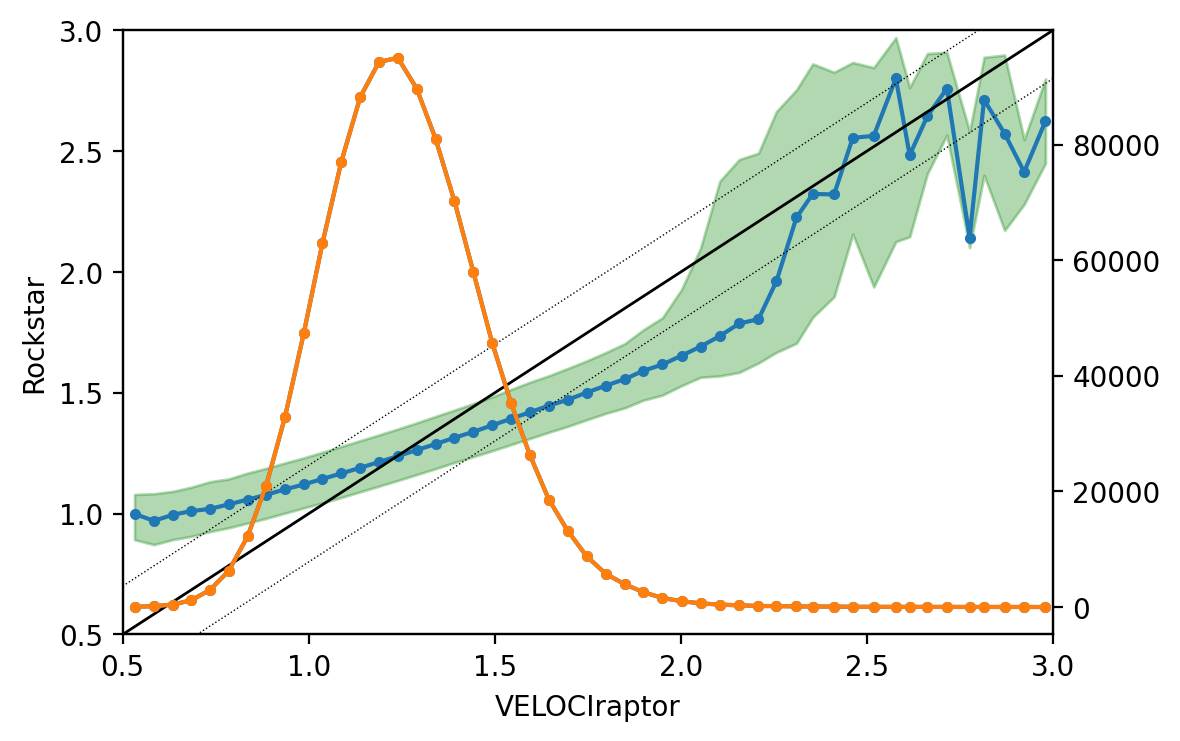

In [529]:
fig1, ax1 = plt.subplots(1, dpi=200)
ax1.plot((smpldf_grpd_vr_median.vr), (smpldf_grpd_vr_median.rs), marker='o', markersize=3)
# plt.errorbar((hal_plot_mass_grpd_median.vr), (hal_plot_mass_grpd_median.rs), yerr= [(hal_plot_mass_grpd_median.rs)-(hal_plot_mass_grpd_1sig_l.rs), (hal_plot_mass_grpd_1sig_r.rs)-(hal_plot_mass_grpd_median.rs)])
ax1.fill_between((smpldf_grpd_vr_median.vr), (smpldf_grpd_vr_1sig_l.rs), (smpldf_grpd_vr_1sig_r.rs), color='green', alpha=.3)
scatrange = (.5,3)
ax1.set_xlim(*scatrange)
ax1.set_ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
ax1.plot(scatranx,scatranx,'k-', lw=1)
ax1.plot(scatranx,scatranx-0.2,'k:', lw=.5)
ax1.plot(scatranx,scatranx+0.2,'k:', lw=.5)
ax1.set_ylabel('Rockstar')
ax1.set_xlabel('VELOCIraptor')
ax2 = ax1.twinx()
ax2.plot((smpldf_grpd_vr_median.vr), (smpldf_grpd_vr.count()), marker='o', markersize=3)
# plt.savefig('mockvar.svg')

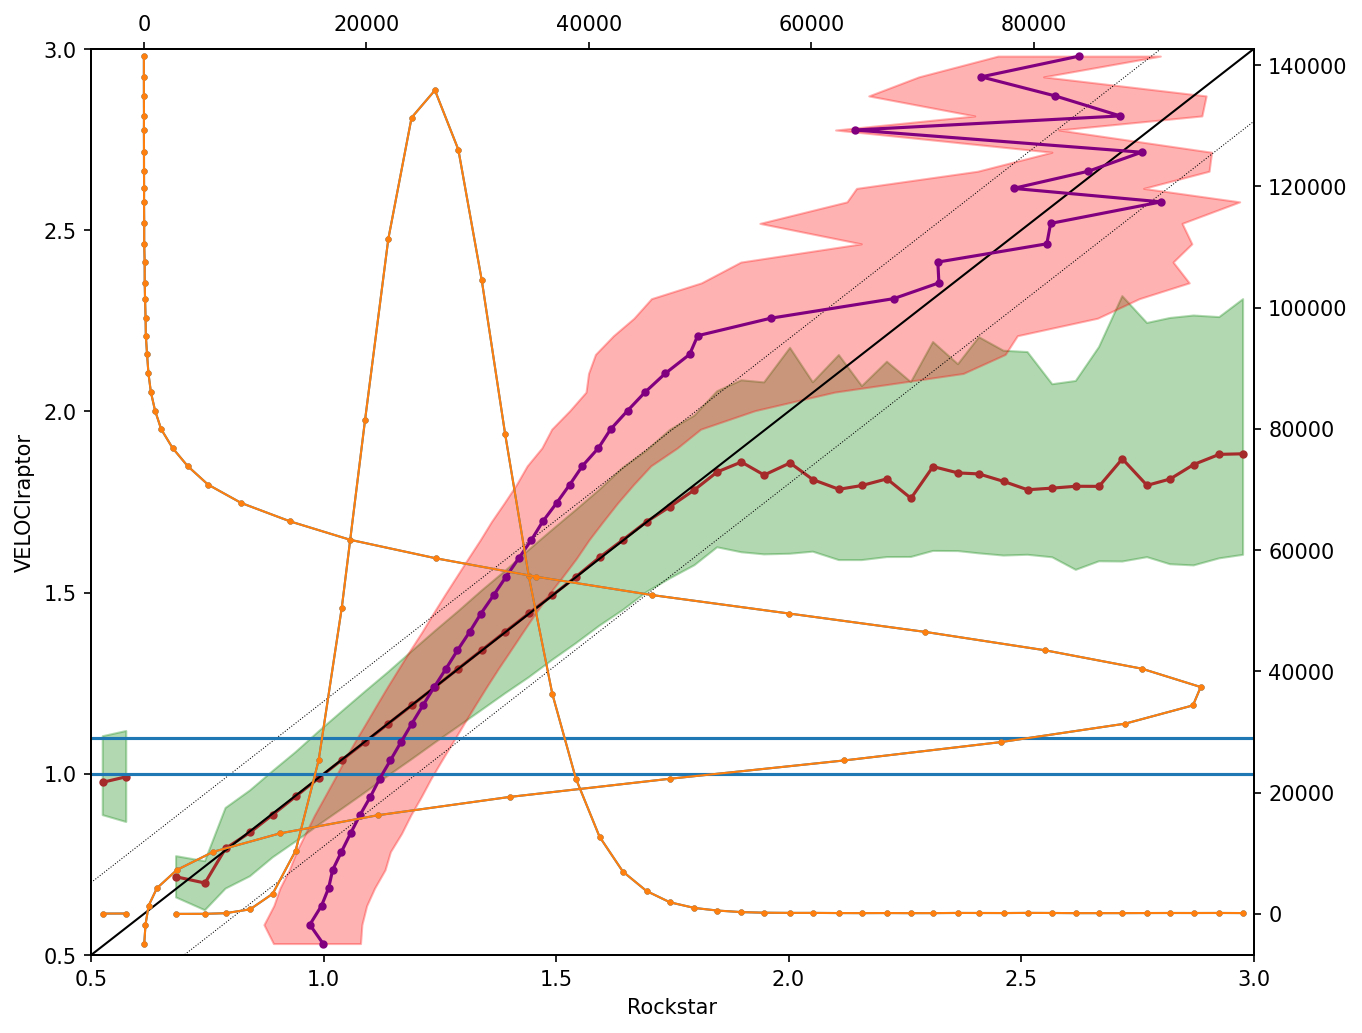

In [530]:
fig1, ax1 = plt.subplots(1, figsize=(10,8), dpi=150)
ax1.plot((smpldf_grpd_rs_median.rs), (smpldf_grpd_rs_median.vr), marker='o', markersize=3, color='brown')
# plt.errorbar((hal_plot_mass_grpd_median.rs), (hal_plot_mass_grpd_median.vr), yerr= [(hal_plot_mass_grpd_median.vr)-(hal_plot_mass_grpd_1sig_l.vr), (hal_plot_mass_grpd_1sig_r.vr)-(hal_plot_mass_grpd_median.vr)])
ax1.fill_between((smpldf_grpd_rs_median.rs), (smpldf_grpd_rs_1sig_l.vr), (smpldf_grpd_rs_1sig_r.vr), color='green', alpha=.3)
scatrange = (.5,3)
ax1.set_xlim(*scatrange)
ax1.set_ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
ax1.plot(scatranx,scatranx,'k-', lw=1)
ax1.plot(scatranx,scatranx-0.2,'k:', lw=.5)
ax1.plot(scatranx,scatranx+0.2,'k:', lw=.5)
ax1.set_xlabel('Rockstar')
ax1.set_ylabel('VELOCIraptor')
ax2 = ax1.twinx()
ax2.plot((smpldf_grpd_rs_median.rs), (smpldf_grpd_rs.count()), marker='o', markersize=2, linewidth=1)
ax1.axhline(1)
ax1.axhline(1.1)
ax1.plot((smpldf_grpd_vr_median.rs), (smpldf_grpd_vr_median.vr), marker='o', markersize=3, color='purple')
# plt.errorbar((hal_plot_mass_grpd_median.vr), (hal_plot_mass_grpd_median.rs), yerr= [(hal_plot_mass_grpd_median.rs)-(hal_plot_mass_grpd_1sig_l.rs), (hal_plot_mass_grpd_1sig_r.rs)-(hal_plot_mass_grpd_median.rs)])
ax1.fill_betweenx((smpldf_grpd_vr_median.vr), (smpldf_grpd_vr_1sig_l.rs), (smpldf_grpd_vr_1sig_r.rs), color='red', alpha=.3)
ax3 = ax1.twiny()
ax3.plot((smpldf_grpd_vr.count()), (smpldf_grpd_vr_median.vr), marker='o', markersize=2, linewidth=1)
plt.savefig('mockvar.svg')

In [31]:
matched_vr_idx = []
matched_rs_idx = []

In [33]:
dfmt = pd.DataFrame(data={'vr':matched_vr_idx,'rs':matched_rs_idx})

In [34]:
dfmt.append([2,1])

,0,rs,vr
0,2.0,NaN,NaN
1,1.0,NaN,NaN


In [35]:
import multiprocessing as mp

In [36]:
pool = mp.Pool(processes=30)

Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Process ForkPoolWorker-3:
Process ForkPoolWorker-10:
Process ForkPoolWorker-4:
Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
Process ForkPoolWorker-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/multiprocessing/process.py", 

In [ ]:
def largeonly(a):
    if a>0:
        return a

In [38]:
la = [1,2,3,10,11,12,13,5]

In [ ]:
pool.map(largeonly,la)